### K-Nearest Neighbours

#### Objective
- To create a model that divides data

#### Dataset
- https://archive.ics.uci.edu/datasets
- There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?".
- Class distribution:
  - Benign: 458 (65.5%)
  - Malignant: 241 (34.5%)

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, neighbors

In [35]:
# Open file
df = pd.read_csv("breast-cancer-wisconsin-original/breast-cancer-wisconsin.data", header=None)
# Name columns from breast-cancer-wisconsin.names
df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marginal_adhesion','single_epith_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli','mitoses', 'class']

In [36]:
# View data
df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [37]:
# Handle missing data
df.replace('?',-99999, inplace=True)

# Select features
df.drop(['id'], axis=1, inplace=True)

In [38]:
df

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [39]:
# Define X and y
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

# Splitting in train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# Initialize model
clf = neighbors.KNeighborsClassifier()

# Train model
clf.fit(X_train, y_train)

# Check accuracy using test
accuracy = clf.score(X_test, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.9714285714285714


In [51]:
# Predict
example = [
    [4,2,1,1,1,2,3,2,1],
    [4,2,1,2,2,2,3,2,1]
]
example_measures = np.array(example).reshape(len(example),-1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


### Making kNN from scratch

#### Euclidean Distance
- Root square of squared error
- Measures closeness between points

#### kNN
- Choice of k, closest k points

In [85]:
p = []
q = []
p = input("p:").split(",")
q = input('q:').split(",")

p = [float(x) for x in p]
q = [float(x) for x in q]

In [86]:
print(p,q)

[1.0, 3.0] [2.0, 5.0]


In [87]:
from math import sqrt

def euclidean_distance(p,q):
    p = np.array(p, dtype=float)
    q = np.array(q, dtype=float)
    return sqrt( ((q-p)**2).sum() )

In [88]:
print(euclidean_distance(p,q))

2.23606797749979


Defining a dataset and visualizing

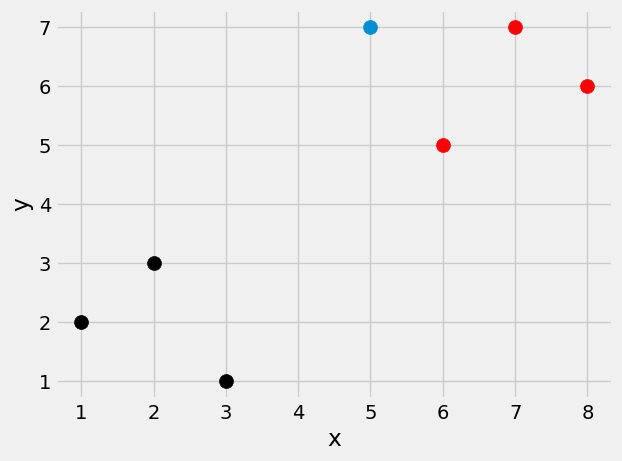

In [97]:
import warnings
from matplotlib import pyplot as plt
from matplotlib import style
from collections import Counter

style.use('fivethirtyeight')

dataset = {'k': [[1,2],[2,3],[3,1]],
           'r': [[6,5],[7,7],[8,6]]
           }

new_features = [5,7]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)

plt.scatter(new_features[0], new_features[1], s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# [[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

Building kNN algorithm
- Compute is comparing prediction point to all other points in the data

In [118]:
def kNN (data, predict, k=5):
    if len(data) >= 3:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            # euclidean_distance = np.sqrt(np.sum( (np.array(features)-np.array(predict))**2 ))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    # print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

[('r', 3)]
r


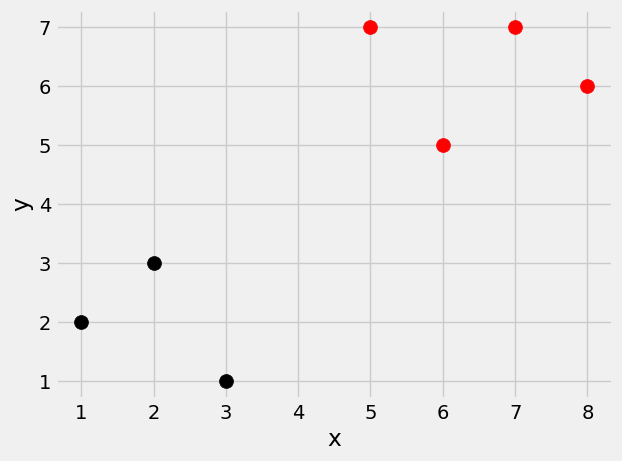

In [98]:
result = kNN(dataset, new_features, k=3)
print(result)

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)

plt.scatter(new_features[0], new_features[1], s=100, color=result)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Use the built algo on dataset

In [119]:
import pandas as pd
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import random

# Open file
df = pd.read_csv("breast-cancer-wisconsin-original/breast-cancer-wisconsin.data", header=None)

# Name columns from breast-cancer-wisconsin.names
df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marginal_adhesion','single_epith_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli','mitoses', 'class']

# Handle missing data
df.replace('?',-99999, inplace=True)

# Select features
df.drop(['id'], axis=1, inplace=True)

# Make sure dataset is int or float
full_data = df.astype(float).values.tolist()

# Shuffle data
random.shuffle(full_data)

# Train test split
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))] # up to last 20% data
test_data = full_data[-int(test_size*len(full_data)):] # last 20% data

# Populate sets
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = kNN(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1

print('Accuracy:', correct/total)
print('Confidence:', confidence)

1.0
0.6
0.8
0.8
0.8
0.8
0.6
0.6
0.6
Accuracy: 0.935251798561151
Confidence: 1.0


- Effect of k to accuracy

In [124]:
accuracies = []
for i in range(25):
    # Open file
    df = pd.read_csv("breast-cancer-wisconsin-original/breast-cancer-wisconsin.data", header=None)

    # Name columns from breast-cancer-wisconsin.names
    df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marginal_adhesion','single_epith_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli','mitoses', 'class']

    # Handle missing data
    df.replace('?',-99999, inplace=True)

    # Select features
    df.drop(['id'], axis=1, inplace=True)

    # Make sure dataset is int or float
    full_data = df.astype(float).values.tolist()

    # Shuffle data
    random.shuffle(full_data)

    # Train test split
    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))] # up to last 20% data
    test_data = full_data[-int(test_size*len(full_data)):] # last 20% data

    # Populate sets
    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = kNN(train_set, data, k=5)
            if group == vote:
                correct += 1
            total += 1

    accuracies.append(correct/total)

print((sum(accuracies)/len(accuracies)))

0.9717985611510791


In [126]:
accuracies = []
for i in range(25):
    # Open file
    df = pd.read_csv("breast-cancer-wisconsin-original/breast-cancer-wisconsin.data", header=None)

    # Name columns from breast-cancer-wisconsin.names
    df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marginal_adhesion','single_epith_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli','mitoses', 'class']

    # Handle missing data
    df.replace('?',-99999, inplace=True)

    # Select features
    df.drop(['id'], axis=1, inplace=True)

    # Define X and y
    X = np.array(df.drop(['class'], axis=1))
    y = np.array(df['class'])

    # Splitting in train and test sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

    # Initialize model
    clf = neighbors.KNeighborsClassifier()

    # Train model
    clf.fit(X_train, y_train)

    # Check accuracy using test
    accuracy = clf.score(X_test, y_test)

    # Predict
    # example = [
    #     [4,2,1,1,1,2,3,2,1],
    #     [4,2,1,2,2,2,3,2,1]
    # ]
    # example_measures = np.array(example).reshape(len(example),-1)
    # prediction = clf.predict(example_measures)
    # print(prediction)
    accuracies.append(accuracy)

print(sum(accuracies)/len(accuracies))

0.9702857142857142


Why is the model built from scratch slower than the scikit-learn model?

Difference:
- default n_jobs=1
- knn can be threaded